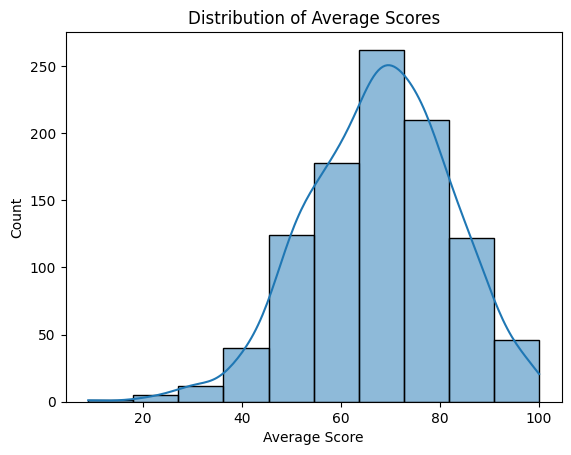

C:\Users\sahus\AppData\Local\Temp\ipykernel_4648\3969091736.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='performance_band', data=df, order=['Poor', 'Average', 'Good', 'Excellent'], palette='Set2')


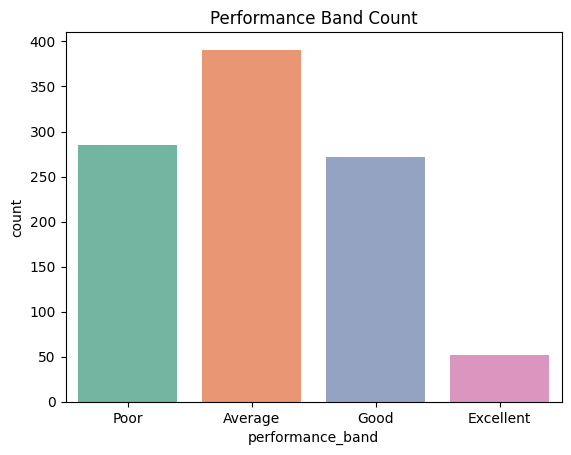

C:\Users\sahus\AppData\Local\Temp\ipykernel_4648\3969091736.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='parental_level_of_education', y='average_score', data=df, palette='viridis')


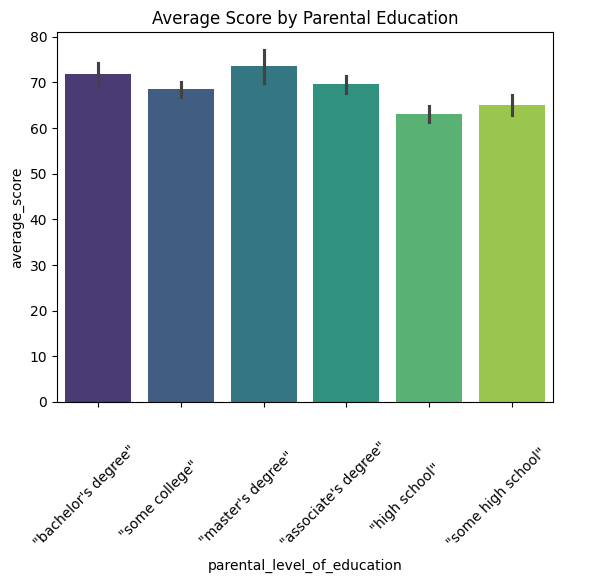

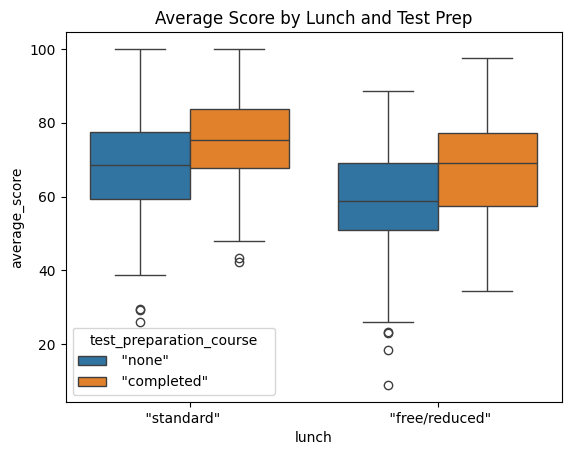

C:\Users\sahus\AppData\Local\Temp\ipykernel_4648\3969091736.py:166: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pass_rates.index, y=pass_rates.values, palette='coolwarm')


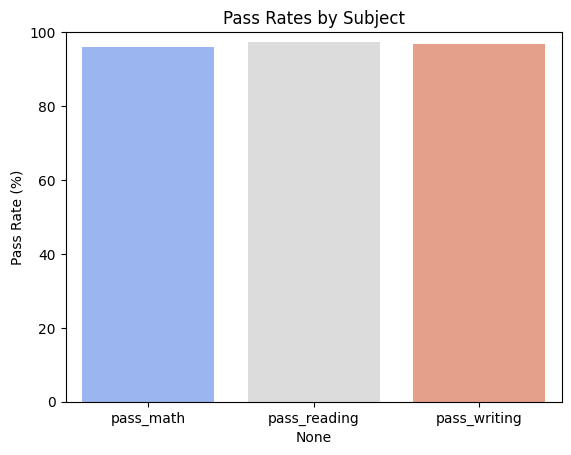

   gender  average_score
0  female      69.569498
1  male        65.837483


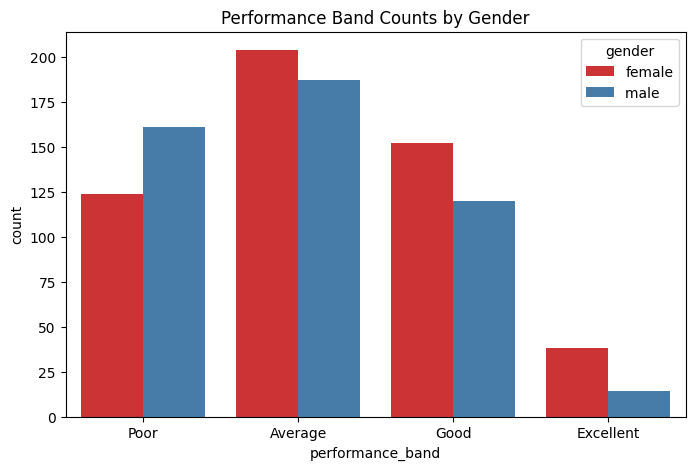

In [31]:
# ✅ Step 0: Setup and Load Dataset
# Import required libraries and read your dataset.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('data/stud.csv')  # Replace with the actual file name
df.head()
# | Index | gender | "race_ethnicity" | "parental_level_of_education" | "lunch"        | "test_preparation_course" | "math_score" | "reading_score" | "writing_score" |
# |-------|--------|------------------|-------------------------------|----------------|----------------------------|--------------|------------------|------------------|
# | 0     | female | "group B"        | "bachelor's degree"           | "standard"     | "none"                     | "72"         | "72"             | "74"             |
# | 1     | female | "group C"        | "some college"                | "standard"     | "completed"                | "69"         | "90"             | "88"             |
# | 2     | female | "group B"        | "master's degree"             | "standard"     | "none"                     | "90"         | "95"             | "93"             |
# | 3     | male   | "group A"        | "associate's degree"          | "free/reduced" | "none"                     | "47"         | "57"             | "44"             |
# | 4     | male   | "group C"        | "some college"                | "standard"     | "none"                     | "76"         | "78"             | "75"             |


# ✅ Step 1: Create average_score Column
# 📌 Goal:
# Combine the three exam scores into a single average score.
# Clean column names
# Step 1: Clean column names
df.columns = df.columns.str.strip().str.replace('"', '')

#Clean and convert score columns
score_cols = ['math_score', 'reading_score', 'writing_score']
for col in score_cols:
    df[col] = df[col].str.strip().str.replace('"', '').astype(int)

#Create average score column
df['average_score'] = df[score_cols].mean(axis=1)
# Preview
df.head()
# | Index | gender | race_ethnicity | parental_level_of_education | lunch          | test_preparation_course | math_score | reading_score | writing_score | average_score |
# |-------|--------|----------------|-----------------------------|----------------|--------------------------|------------|----------------|----------------|----------------|
# | 0     | female | "group B"      | "bachelor's degree"         | "standard"     | "none"                   | 72         | 72             | 74             | 72.666667      |
# | 1     | female | "group C"      | "some college"              | "standard"     | "completed"              | 69         | 90             | 88             | 82.333333      |
# | 2     | female | "group B"      | "master's degree"           | "standard"     | "none"                   | 90         | 95             | 93             | 92.666667      |
# | 3     | male   | "group A"      | "associate's degree"        | "free/reduced" | "none"                   | 47         | 57             | 44             | 49.333333      |
# | 4     | male   | "group C"      | "some college"              | "standard"     | "none"                   | 76         | 78             | 75             | 76.333333      |

# ✅ Step 2: Encode Categorical Variables
# 📌 Option A: Label Encoding (for tree-based models)
label_encoders = {}
categorical_cols = ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']

for col in categorical_cols:
    le = LabelEncoder()
    df[f'{col}_le'] = le.fit_transform(df[col])
    label_encoders[col] = le

# 📌 Option B: One-Hot Encoding (for linear models)
df_onehot = pd.get_dummies(df[categorical_cols], drop_first=True, prefix_sep='__')
df = pd.concat([df, df_onehot], axis=1)

# ✅ Step 3: Create Performance Band
# 📌 Goal:
# Group students into performance categories based on average score.
def performance_band(avg):
    if avg >= 90:
        return 'Excellent'
    elif avg >= 75:
        return 'Good'
    elif avg >= 60:
        return 'Average'
    else:
        return 'Poor'

df['performance_band'] = df['average_score'].apply(performance_band)
df[['average_score', 'performance_band']]
# | Index | average_score | performance_band |
# |-------|---------------|------------------|
# | 0     | 72.666667     | Average          |
# | 1     | 82.333333     | Good             |
# | 2     | 92.666667     | Excellent        |
# | 3     | 49.333333     | Poor             |
# | 4     | 76.333333     | Good             |
# | ...   | ...           | ...              |
# | 995   | 94.000000     | Excellent        |
# | 996   | 57.333333     | Poor             |
# | 997   | 65.000000     | Average          |
# | 998   | 74.333333     | Average          |
# | 999   | 83.000000     | Good             |

# 1000 rows × 2 columns

df['pass_math'] = (df['math_score'] >= 40).astype(int)
df['pass_reading'] = (df['reading_score'] >= 40).astype(int)
df['pass_writing'] = (df['writing_score'] >= 40).astype(int)
df[['math_score', 'pass_math', 'reading_score', 'pass_reading', 'writing_score', 'pass_writing']]
# | Index | math_score | pass_math | reading_score | pass_reading | writing_score | pass_writing |
# |-------|------------|-----------|----------------|---------------|----------------|---------------|
# | 0     | 72         | 1         | 72             | 1             | 74             | 1             |
# | 1     | 69         | 1         | 90             | 1             | 88             | 1             |
# | 2     | 90         | 1         | 95             | 1             | 93             | 1             |
# | 3     | 47         | 1         | 57             | 1             | 44             | 1             |
# | 4     | 76         | 1         | 78             | 1             | 75             | 1             |
# | ...   | ...        | ...       | ...            | ...           | ...            | ...           |
# | 995   | 88         | 1         | 99             | 1             | 95             | 1             |
# | 996   | 62         | 1         | 55             | 1             | 55             | 1             |
# | 997   | 59         | 1         | 71             | 1             | 65             | 1             |
# | 998   | 68         | 1         | 78             | 1             | 77             | 1             |
# | 999   | 77         | 1         | 86             | 1             | 86             | 1             |

# ✅ Step 5: Interaction Features
df['lunch_testprep'] = df['lunch'] + ' & ' + df['test_preparation_course']
df['parent_edu_vs_avg'] = df['parental_level_of_education'] + ' | ' + df['performance_band']
df[['lunch_testprep', 'parent_edu_vs_avg']]
# | Index | lunch_testprep                     | parent_edu_vs_avg                        |
# |-------|------------------------------------|------------------------------------------|
# | 0     | "standard"     &amp;  "none"       | "bachelor's degree"           | Average  |
# | 1     | "standard"     &amp;  "completed"  | "some college"                | Good     |
# | 2     | "standard"     &amp;  "none"       | "master's degree"             | Excellent|
# | 3     | "free/reduced" &amp;  "none"       | "associate's degree"          | Poor     |
# | 4     | "standard"     &amp;  "none"       | "some college"                | Good     |
# | ...   | ...                                | ...                                      |
# | 995   | "standard"     &amp;  "completed"  | "master's degree"             | Excellent|
# | 996   | "free/reduced" &amp;  "none"       | "high school"                 | Poor     |
# | 997   | "free/reduced" &amp;  "completed"  | "high school"                 | Average  |
# | 998   | "standard"     &amp;  "completed"  | "some college"                | Average  |
# | 999   | "free/reduced" &amp;  "none"       | "some college"                | Good     |

# ✅ Step 6: Display Final DataFrame
df.head()
# | Index | gender | race_ethnicity | parental_level_of_education | lunch         | test_preparation_course | math_score | reading_score | writing_score | average_score | gender_le | ... | parental_level_of_education__ "some college" | parental_level_of_education__ "some high school" | lunch__ "standard" | test_preparation_course__ "none" | performance_band | pass_math | pass_reading | pass_writing | lunch_testprep                    | parent_edu_vs_avg                          |
# |-------|--------|----------------|------------------------------|---------------|--------------------------|------------|----------------|----------------|----------------|-----------|-----|---------------------------------------------|--------------------------------------------------|---------------------|-----------------------------------|-------------------|-----------|---------------|----------------|-------------------------------------|---------------------------------------------|
# | 0     | female | "group B"      | "bachelor's degree"          | "standard"    | "none"                   | 72         | 72             | 74             | 72.666667      | 0         | ... | False                                       | False                                            | True                | True                              | Average           | 1         | 1             | 1              | "standard"     &amp;  "none"       | "bachelor's degree"           | Average      |
# | 1     | female | "group C"      | "some college"               | "standard"    | "completed"              | 69         | 90             | 88             | 82.333333      | 0         | ... | True                                        | False                                            | True                | False                             | Good              | 1         | 1             | 1              | "standard"     &amp;  "completed"  | "some college"                | Good         |
# | 2     | female | "group B"      | "master's degree"            | "standard"    | "none"                   | 90         | 95             | 93             | 92.666667      | 0         | ... | False                                       | False                                            | True                | True                              | Excellent         | 1         | 1             | 1              | "standard"     &amp;  "none"       | "master's degree"             | Excellent     |
# | 3     | male   | "group A"      | "associate's degree"         | "free/reduced"| "none"                   | 47         | 57             | 44             | 49.333333      | 1         | ... | False                                       | False                                            | False               | True                              | Poor              | 1         | 1             | 1              | "free/reduced" &amp;  "none"       | "associate's degree"          | Poor          |
# | 4     | male   | "group C"      | "some college"               | "standard"    | "none"                   | 76         | 78             | 75             | 76.333333      | 1         | ... | True                                        | False                                            | True                | True                              | Good              | 1         | 1             | 1              | "standard"     &amp;  "none"       | "some college"                | Good          |

# ✅ Step 7: Visualizations
# 📊 1. Average Score Distribution
 
sns.histplot(df['average_score'], bins=10, kde=True)
plt.title('Distribution of Average Scores')
plt.xlabel('Average Score')
plt.ylabel('Count')
plt.show()

# 📊 2. Performance Bands Count
 
sns.countplot(x='performance_band', data=df, order=['Poor', 'Average', 'Good', 'Excellent'], palette='Set2')
plt.title('Performance Band Count')
plt.show()

# 📊 3. Average Score by Parental Education

sns.barplot(x='parental_level_of_education', y='average_score', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Average Score by Parental Education')
plt.show()

# 📊 4. Lunch vs Test Prep Course
 
sns.boxplot(x='lunch', y='average_score', hue='test_preparation_course', data=df)
plt.title('Average Score by Lunch and Test Prep')
plt.show()

# 📊 5. Pass Rate per Subject
 
pass_rates = df[['pass_math', 'pass_reading', 'pass_writing']].mean() * 100
sns.barplot(x=pass_rates.index, y=pass_rates.values, palette='coolwarm')
plt.title('Pass Rates by Subject')
plt.ylabel('Pass Rate (%)')
plt.ylim(0, 100)
plt.show()


# Step 1: Group average scores by gender
 
avg_scores_gender = df.groupby('gender')['average_score'].mean().reset_index()
print(avg_scores_gender)
# gender  average_score
# 0  female      69.569498
# 1  male        65.837483

# Step 2: Performance band counts split by gender

plt.figure(figsize=(8,5))
sns.countplot(x='performance_band', hue='gender', data=df, order=['Poor', 'Average', 'Good', 'Excellent'], palette='Set1')
plt.title('Performance Band Counts by Gender')
plt.show()






